# Tutorial 10 - Clustering

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Describe a case where clustering would be an appropriate tool, and what insight it would bring from the data.
* Explain the k-means clustering algorithm.
* Interpret the output of a k-means cluster analysis.
* Perform k-means clustering in R using `k-means`
* Visualize the output of k-means clustering in R using a coloured scatter plot 
* Identify when it is necessary to scale variables before clustering and do this using R
* Use the elbow method to choose the number of clusters for k-means
* Describe advantages, limitations and assumptions of the kmeans clustering algorithm.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)
source('tests_tutorial_10.R')
source("cleanup_tutorial_10.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘broom’ was built under R version 4.0.2”

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is ma

# 1. Pokemon

We will be working with the Pokemon dataset from Kaggle, which can be found [here.](https://www.kaggle.com/abcsds/pokemon)
This dataset compiles the statistics on 721 Pokemon. The information in this dataset includes Pokemon name, type, health points, attack strength, defensive strength, speed points etc. These are values that apply to a Pokemon's abilities (higher values are better). We are interested in seeing if there are any sub-groups/clusters of pokemon based on these statistics. And if so, how many sub-groups/clusters there are.

![](https://media.giphy.com/media/3oEduV4SOS9mmmIOkw/giphy.gif)

Source: https://media.giphy.com/media/3oEduV4SOS9mmmIOkw/giphy.gif


**Question 1.0**
<br> {points: 1}

Use `read_csv` to load `pokemon.csv` from the `data/` folder.

*Assign your answer to an object called `pm_data`.*

In [2]:
# your code here
pm_data <- read_csv("data/pokemon.csv")
pm_data

Parsed with column specification:
cols(
  `#` = col_double(),
  Name = col_character(),
  `Type 1` = col_character(),
  `Type 2` = col_character(),
  Total = col_double(),
  HP = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  `Sp. Atk` = col_double(),
  `Sp. Def` = col_double(),
  Speed = col_double(),
  Generation = col_double(),
  Legendary = col_logical()
)



#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE


In [3]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br> {points: 1}

Create a matrix of plots using `ggpairs`, choosing columns 5 to 11 (or equivalently, columns `Total` to `Speed`) from `pm_data`. First use the `select` function to extract columns `"Total":"Speed"`, and then pass the resulting dataframe to `ggpairs` to plot.

*Assign your answer to an object called `pm_pairs`.*

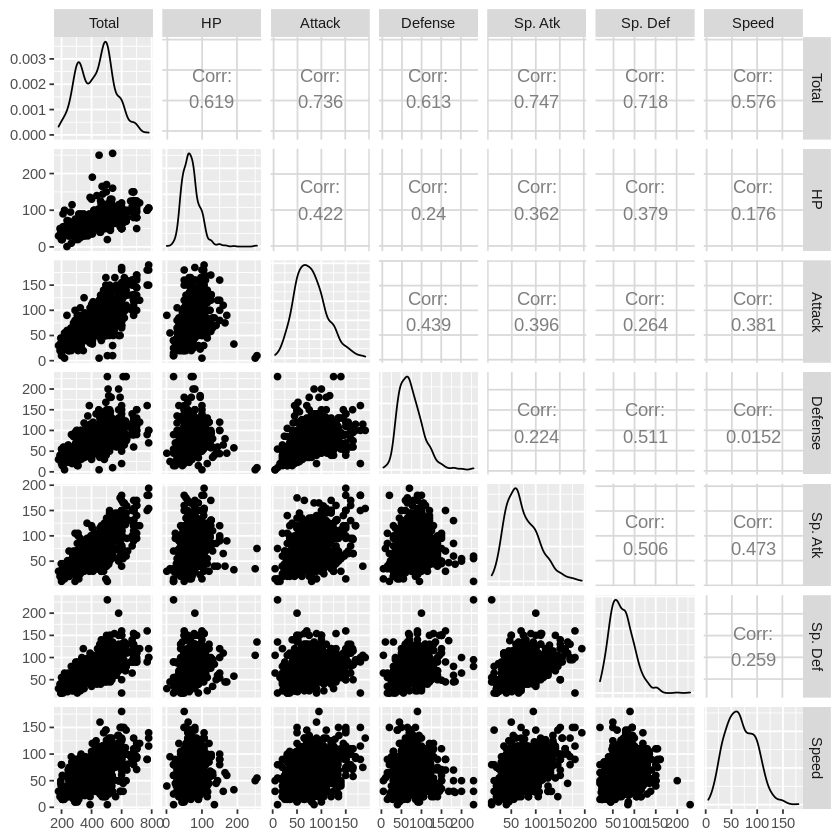

In [4]:
# your code here
pm_pairs <- select(pm_data, "Total": "Speed") %>% ggpairs()
pm_pairs

In [5]:
test_1.1()

[1] "Success!"


**Question 1.2** 
<br> {points: 1}

Select the columns `Speed` and `Defense`, creating a new dataframe with only those columns.

*Assign your answer to an object named `km_data`.*

In [6]:
# your code here
km_data <- select(pm_data, Speed, Defense)
km_data

Speed,Defense
<dbl>,<dbl>
45,49
60,63
80,83
⋮,⋮
70,60
80,60
70,120


In [7]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br> {points: 1}

Make a scatterplot to visualize the relationship between `Speed` and `Defense` of the Pokemon. Put the `Speed` variable on the x-axis, and the `Defense` variable on the y-axis.

*Assign your plot to an object called `pm_scatter`. Don't forget to do everything needed to make an effective visualization.*

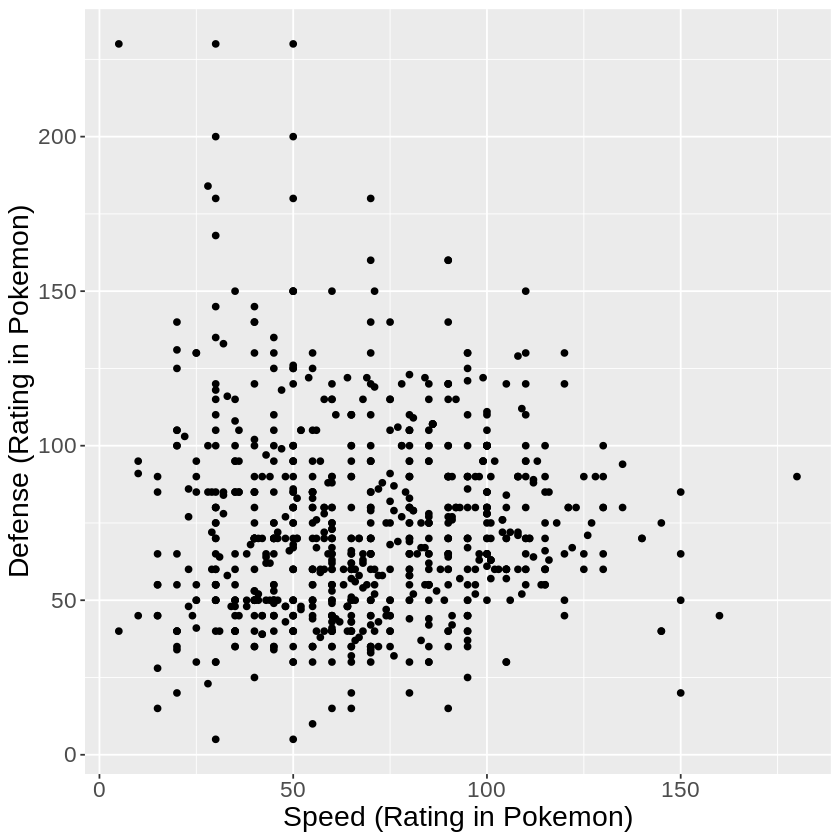

In [8]:
# your code here
pm_scatter <- ggplot(km_data, aes(x = Speed, y = Defense)) +
  geom_point() +
  xlab("Speed (Rating in Pokemon)") +
  ylab("Defense (Rating in Pokemon)")+
  theme(text = element_text(size = 17))
pm_scatter

In [9]:
test_1.3()

[1] "Success!"


**Question 1.4.1** 
<br> {points: 3}

We are going to cluster the Pokemon based on their `Speed` and `Defense`. Will it matter much for our clustering if we scale our variables? Is there any argument against scaling here?

It will not matter as much, because we can see that both Speed and Defense ratings are in a similar range, they both have values between 0 and 200. However, if we scale our variables, the results of clustering wouldn't be too different since one variable is not in 0.01s and the other one is not in 1000s. So the distance wouldn't be very different, but there is an argument against scaling here which is our Speed variable would be zero-centered and scaled, so we would get negative values of speed. That is very hard to interpret, what does it mean to have negative speed etc? So, we can say that scaling would negatively affect our understanding/interpretation of variables here. 

**Question 1.4.2**
<br> {points: 1}

Now, let's use the `kmeans` function to cluster the Pokemon based on their `Speed` and `Defense` variables. For this question, use $k$ = 4. As good practice, let's standardize the data here first using `scale`. Name the standardized data `scaled_km_data`.

*Assign your answer to an object called `pokemon_clusters`.*

**Note:** We set the random seed here because `kmeans` initializes observations to random clusters.

In [10]:
#DON'T CHANGE THE SEED VALUE BELOW!
set.seed(2019)

# your code here
scaled_km_data <- km_data %>% mutate(across(everything(), scale))
#scaled_km_data
pokemon_clusters <- kmeans(scaled_km_data, centers = 4)
pokemon_clusters

K-means clustering with 4 clusters of sizes 259, 180, 99, 262

Cluster means:
       Speed     Defense
1 -0.5486990 -0.89261236
2 -0.7505326  0.31771609
3 -0.1256427  1.86306518
4  1.1055250 -0.03986927

Clustering vector:
  [1] 1 1 4 3 1 4 4 4 4 2 2 3 3 1 1 1 1 1 1 4 1 1 4 4 1 4 1 4 1 4 4 4 2 3 1 2 4
 [38] 1 1 4 1 2 1 4 1 1 1 4 1 2 2 1 2 1 4 4 4 4 4 1 4 1 4 1 4 4 4 2 1 4 4 4 1 2
 [75] 2 1 1 1 1 4 2 2 3 4 4 2 2 3 2 2 1 1 4 1 2 1 2 2 3 1 4 4 4 3 1 2 2 3 4 4 2
[112] 2 2 2 4 4 2 2 3 2 3 1 3 4 4 2 4 1 1 4 4 4 4 4 4 4 4 3 4 4 4 3 2 1 1 1 4 1
[149] 2 2 3 2 3 4 4 2 4 4 4 1 1 4 4 4 4 4 2 2 4 1 4 4 2 2 3 1 4 1 1 1 4 1 2 4 1
[186] 1 1 1 1 2 2 1 4 1 1 2 2 2 1 2 2 2 1 1 4 4 1 1 4 1 2 4 3 4 2 4 1 1 4 2 3 2
[223] 3 3 3 1 2 4 2 3 3 4 3 4 1 2 1 3 1 2 2 1 2 1 2 3 1 4 4 4 1 3 2 4 1 1 2 1 4
[260] 1 4 1 4 4 3 1 2 3 3 3 4 4 1 4 4 4 1 1 4 4 1 2 2 3 1 2 1 4 1 1 1 1 2 1 1 2
[297] 1 1 4 1 4 1 2 1 1 4 4 1 1 1 2 1 4 4 2 4 1 1 1 1 1 1 1 3 1 1 2 3 2 3 2 3 3
[334] 3 1 4 4 1 4 4 4 4 4 4 1 1 2 1 4 4 1 1 1 2 2 3 1 4 1

In [11]:
test_1.4.2()

[1] "Success!"


**Question 1.5**
<br> {points: 1}

Let's visualize the clusters we built in `pokemon_clusters`. For this we can use the `broom` package.

> "The broom package takes the messy output of built-in functions in R, such as lm, nls, or t.test, and turns them into tidy data frames." - [Broom Package](https://cran.r-project.org/web/packages/broom/vignettes/broom.html)

Your tasks:

1. Use the `augment` function create a data frame with the cluster assignments for each data point from k-means (should have the columns `Speed` and `Defense` and `.cluster`). 
2. Create a scatter plot of `Speed` (x-axis) vs `Defense` (y-axis) with the points coloured by their cluster assignment. 

Name this plot `answer1.5`.

Speed,Defense,.cluster
"<dbl[,1]>","<dbl[,1]>",<fct>
-0.8010021,-0.7966553,1
-0.2848371,-0.3476999,1
0.4033830,0.2936649,4
⋮,⋮,⋮
0.05927295,-0.4439046,1
0.40338296,-0.4439046,4
0.05927295,1.4801898,3


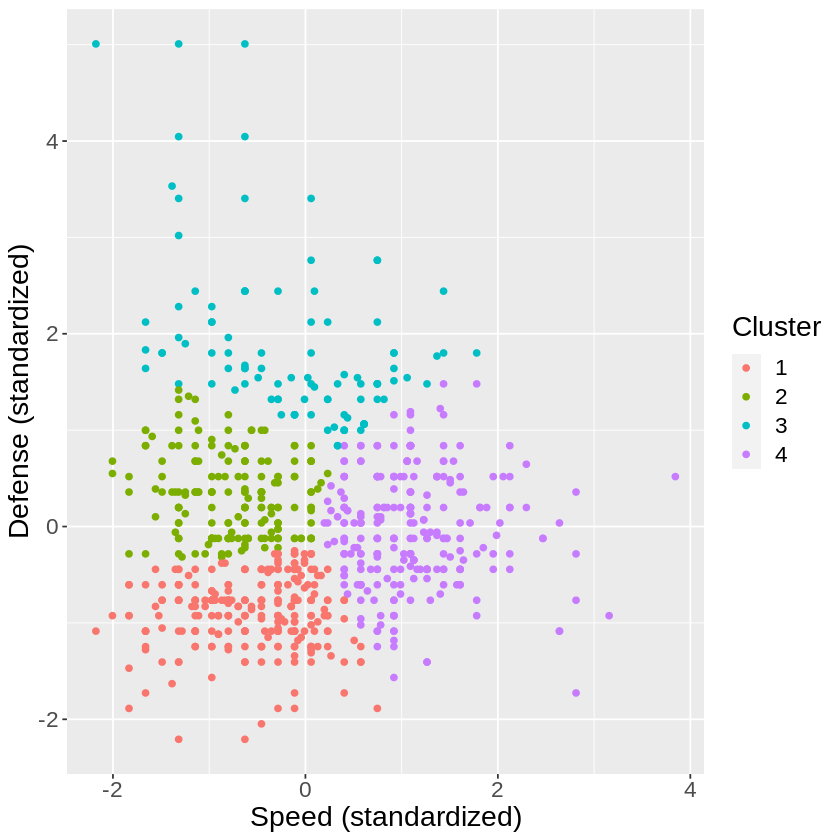

In [12]:
# your code here
clustered_data <- augment(pokemon_clusters, scaled_km_data)
clustered_data
answer1.5 <- ggplot(clustered_data,
  aes(x = Speed, 
      y = Defense, 
      color = .cluster), 
  size = 2) +
  geom_point() +
  labs(x = "Speed (standardized)", 
       y = "Defense (standardized)", 
       color = "Cluster")+
  theme(text = element_text(size = 17))

answer1.5

In [13]:
test_1.5()

[1] "Success!"


**Question 1.6**
<br> {points: 3}

Below you can see multiple initializations of k-means with different seeds for `K = 4`. Can you explain what is happening and how we can mitigate this in the `kmeans` function?

![](imgs/multiple_initializations.png)

We can see that for multiple initializations of the kmeans model with different seeds, we get different clustering results for K=4. The reason for these different clustering results for multiple initializations is that in kmeans algorithm there is a random initialization of where we start at the center for calculating the distance by updating the center and label for each iteration. But for each of these plots we start at different positions and it affects our clustering model. Therefore, we can use the nstart argument in kmeans function to help us mitigate this, and we would get better and more consistent results. For example, if we use nstart=10, we will use 10 restarts by trying 10 different random initializations and R will return the best clustering from this, this way we can prevent finding a bad clustering.  

**Question 1.7**
<br> {points: 1}

We know that choosing a $k$ is an important step of the process. We can do this by examining how the total within-cluster sum of squares changes as we change $k$ on a plot (which we call an elbow plot).

For this exercise, from $k$ = 1 to $k$ = 10, you will calculate the total within-cluster sum of squares:

1. following good practice, make sure you are using the standardized data (`scaled_km_data`)
2. create a tibble with the $k$ values
3. create a new column `poke_clusts` by applying `kmeans` to each value of `k` (set `nstart` to be 10)
4. create a new column `glanced` by applying `glance` to each of the results
5. remove the `poke_clusts` column
6. `unnest` the results of `glance`


*Assign your answer to a tibble object named `elbow_stats`. It should have the columns `k`, `totss`, `tot.withinss`, `betweenss`, and `iter`.*

Remember, to acess the  total within-cluster sum of squares, you can use the `glance` function also from the `broom` package:

In [14]:
glance(pokemon_clusters)

totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<int>
1598,528.2769,1069.723,3


In [15]:
set.seed(2020) # DO NOT REMOVE

# your code here
elbow_stats <- tibble(k = 1:10) %>%
        mutate(poke_clusts = map(k, ~kmeans(scaled_km_data, .x ,nstart=10)), glanced = map(poke_clusts , glance)) %>% select(-poke_clusts) %>% unnest(glanced)
# print(k_vals)

# k_vals <- select(k_vals, -poke_clusts)
# print(k_vals)
# elbow_stats <- k_vals %>%
#  unnest(glanced)


elbow_stats

k,totss,tot.withinss,betweenss,iter
<int>,<dbl>,<dbl>,<dbl>,<int>
1,1598,1598.0000,2.046363e-12,1
2,1598,1031.4596,5.665404e+02,1
3,1598,640.4274,9.575726e+02,3
⋮,⋮,⋮,⋮,⋮
8,1598,269.9280,1328.072,4
9,1598,235.8644,1362.136,4
10,1598,214.3482,1383.652,6


In [16]:
test_1.7()

[1] "Success!"


**Question 1.8**
<br> {points: 1}

Create the elbow plot. Put the within-cluster sum of squares on the y-axis, and the number of clusters on the x-axis.

*Assign your plot to an object called `elbow_plot`*.

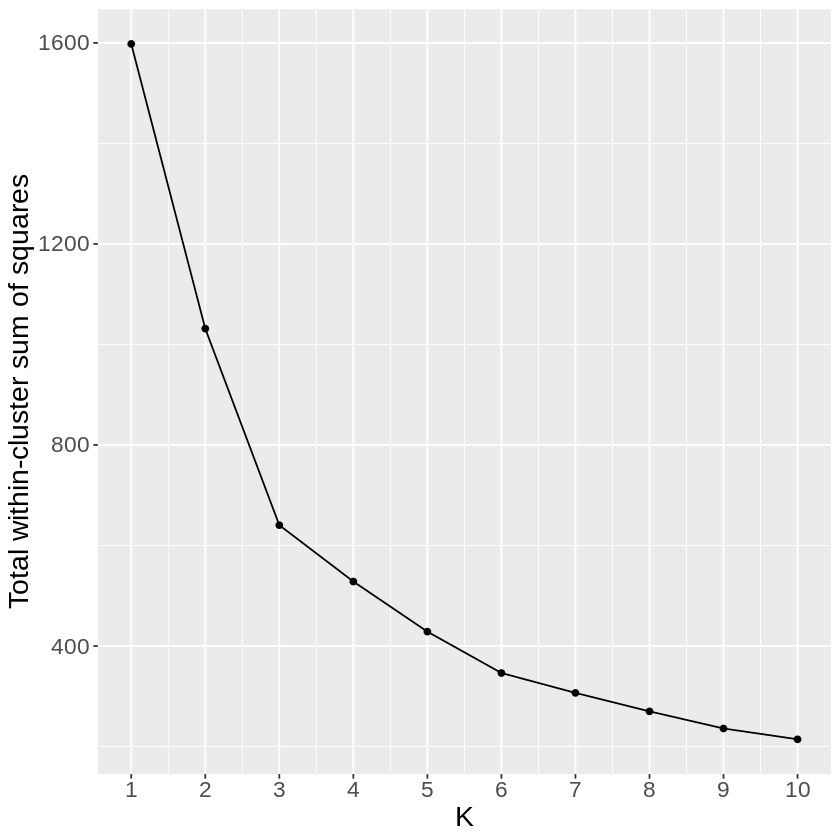

In [17]:
# your code here
elbow_plot <- ggplot(elbow_stats, aes(x = k, y = tot.withinss)) +
  geom_point() +
  geom_line() +
  xlab("K") +
  ylab("Total within-cluster sum of squares") +
  scale_x_continuous(breaks = 1:10)+
  theme(text = element_text(size = 17))
elbow_plot

In [18]:
test_1.8()

[1] "Success!"


**Question 1.9** 
<br> {points: 3}

Based on the elbow plot above, what value of $k$ do you choose? Explain why.

The K value for K means algorithm we should use K=3, because if we look at the elbow plot for K less than 3, we can see that WSSD is large, and for K more than 3 (K>3), we can see that the rate of change of WSSD seems to decrease even though WSSD decreases. That means for K>3 we are actually subgrouping the clusters, and therefore it is not the best K value. So, the elbow point for this plot seems to be at K=3, and we should choose the elbow as K=3.  

**Question 1.10**
<br> {points: 3}

Using the value that you chose for k, perform the k-means algorithm, set `nstart = 10` and assign your answer to an object called `pokemon_final_kmeans`. 

Augment the data with the final cluster labels and assign your answer to an object called `pokemon_final_clusters`. 

Finally, create a plot called `pokemon_final_clusters_plot` to visualize the clusters. Include a title, colour the points by the cluster and make sure your axes are human-readable.

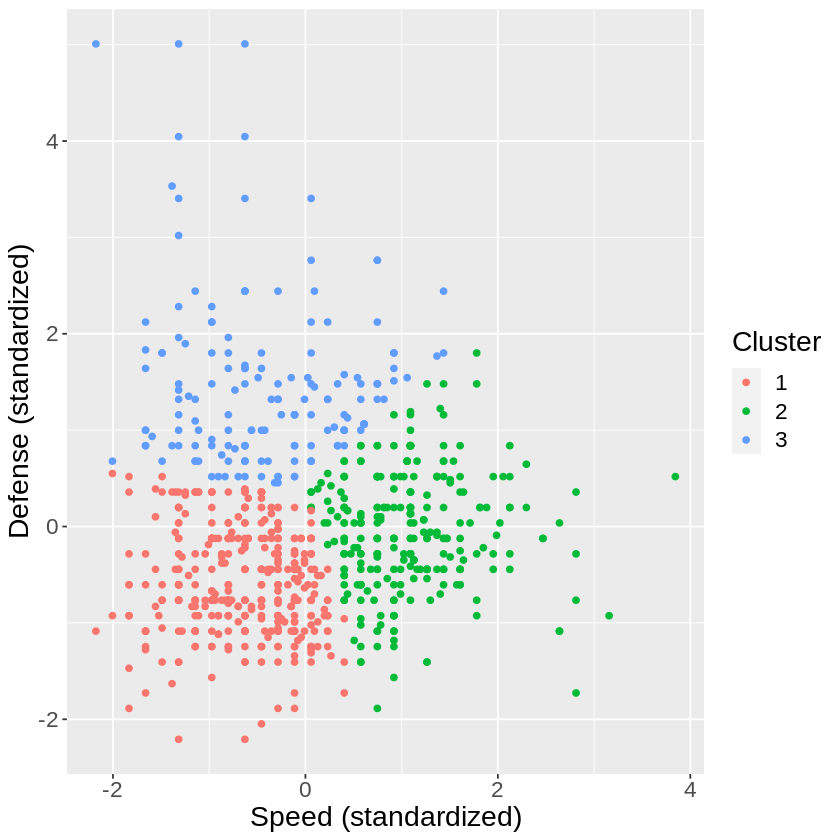

In [19]:
set.seed(2019) # DO NOT REMOVE
# your code here
final_k <- 3
#scaled_km_data
pokemon_final_kmeans <- kmeans(scaled_km_data, centers = final_k, nstart = 10)
pokemon_final_clusters <- augment(pokemon_final_kmeans, scaled_km_data)

pokemon_final_clusters_plot <- ggplot(pokemon_final_clusters, aes(x = Speed, y = Defense, color = .cluster), size = 2) +
  geom_point() +
  labs(x = "Speed (standardized)", 
       y = "Defense (standardized)", 
       color = "Cluster")+
  theme(text = element_text(size = 17))
pokemon_final_clusters_plot

**Question 1.11**
<br> {points: 3}

Using `Speed` and `Defense`, we find some number of clusters in our data. However, we have more information in our dataset that might be useful for clustering. Let's incorporate all of the numeric values to our k-means model. Again use `nstart = 10`.

Your tasks:

1. Select the numeric type columns only from the full data set `pm_data`. For example, do not include the `#` or `Generation`  columns etc. Assign your answer to an object called `pm_multi`.
2. Standardize the columns in `pm_multi` using `scale`.
2. From K = 1 to K = 10, calculate the total within-cluster sum of squares. Set `nstart` to be 10. Assign your answer to an object called `pm_multi_elbow_stats`. 
3. Use the elbow plot method to determine the number of clusters. Assign your answer to an object called `pm_multi_elbow_plot`.
4. Train a k-means model with the number of clusters determined in above. Assign your answer to an object called `multi_kmeans`. 
5. Print the cluster means for the trained model.

K-means clustering with 3 clusters of sizes 291, 360, 149

Cluster means:
       Total         HP     Attack    Defense     Sp. Atk    Sp. Def
1 -1.0851804 -0.7517973 -0.7671034 -0.6844715 -0.73760572 -0.8112439
2  0.2902074  0.3358016  0.2073275  0.2867168  0.03300502  0.2457576
3  1.4182068  0.6569424  0.9972429  0.6440481  1.36081514  0.9905991
        Speed
1 -0.62043301
2  0.09119871
3  0.99137229

Clustering vector:
  [1] 1 2 2 3 1 2 3 3 3 1 2 2 3 1 1 2 1 1 2 2 1 1 2 3 1 2 1 2 1 2 1 2 1 2 1 1 2
 [38] 1 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 1 1 2 1 1 3 3 1 2
 [75] 2 1 1 2 1 2 1 2 2 2 2 1 2 3 1 2 1 1 2 1 2 1 2 1 2 1 1 3 3 1 1 2 1 2 1 2 1
[112] 2 1 2 2 2 2 1 2 1 2 2 2 2 3 1 2 1 2 1 2 2 2 2 2 2 2 3 2 1 2 3 2 1 1 2 3 3
[149] 2 1 2 1 2 2 3 2 3 3 3 1 2 3 3 3 3 3 1 2 2 1 2 3 1 2 2 1 2 1 2 1 2 1 2 2 1
[186] 2 1 1 1 1 2 1 2 1 1 2 3 2 1 2 2 2 1 1 2 1 1 2 1 1 2 3 2 2 2 2 1 2 2 1 2 2
[223] 2 2 2 1 2 2 2 3 2 2 3 2 1 2 1 2 1 2 1 1 2 1 2 2 1 2 3 3 1 2 2 2 1 1 2 1 1
[260] 1 2 2 3 

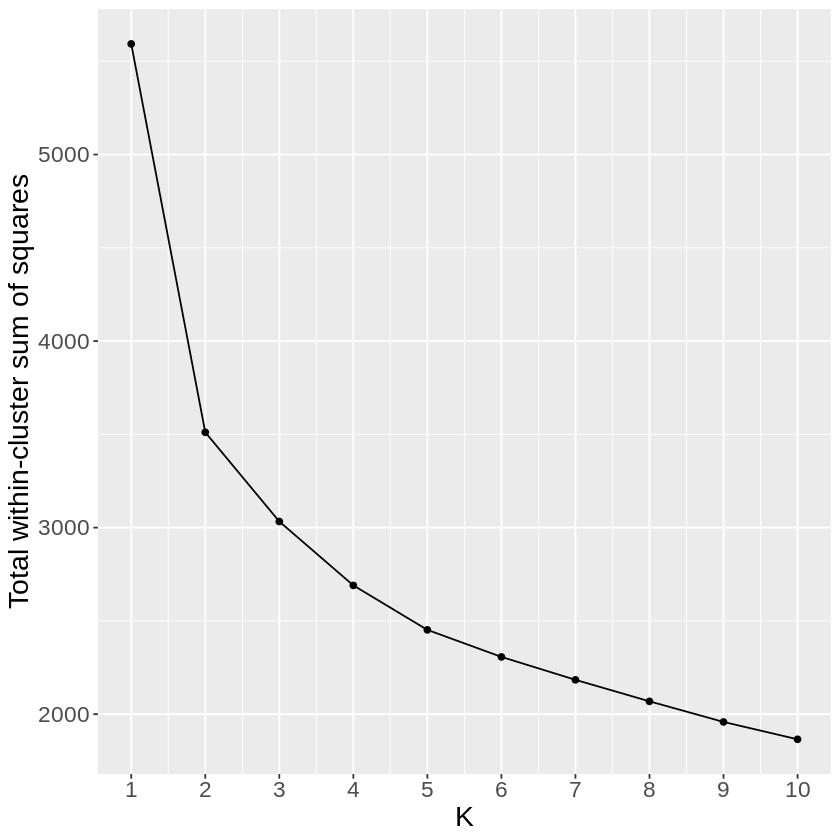

In [20]:
#DON'T CHANGE THIS SEED VALUE
set.seed(2019)

# your code here 3
pm_multi <- select(pm_data, "Total": "Speed")
scaled_pm_multi <- pm_multi %>% mutate(across(everything(), scale))
#scaled_pm_multi # dbl thing is weird 
pm_multi_elbow_stats <- tibble(k = 1:10) %>%
        mutate(poke_clusts = map(k, ~kmeans(scaled_pm_multi, .x ,nstart=10)), glanced = map(poke_clusts , glance)) %>% 
        select(-poke_clusts) %>% unnest(glanced)

pm_multi_elbow_plot <- ggplot(pm_multi_elbow_stats, aes(x = k, y = tot.withinss)) +
  geom_point() +
  geom_line() +
  xlab("K") +
  ylab("Total within-cluster sum of squares") +
  scale_x_continuous(breaks = 1:10)+
  theme(text = element_text(size = 17))
pm_multi_elbow_plot

multi_kmeans <- kmeans(scaled_pm_multi, centers = 3, nstart = 10)
multi_kmeans

multi_clusters <- augment(multi_kmeans, scaled_pm_multi)
#print(multi_clusters)
#multi_clusters

**Question 1.12** 
<br> {points: 3}

Visualizing these clusters is not a simple task given the high-dimensionality of the model. But do the cluster means output help? Justify your reasoning.

Visualizing these clusters is not easy since we have some many different variables, but the clusterig means output would help us understand where the means of these variables are for different clusters. For example, the mean of attack for cluster 1 was -0.63 and for cluster 2 it was 0.57, etc for all these variables used in the algortihm. Therefore, we can kind of see pattern as how the kmeans algorithm did the clustering. It can also  help us see where the center of each clusters are for each variable.

If a point's ecladian distance is close to the mean of one of the clusters, we could say it is part of that cluster etc. So it does help us understand the clustering and interpret it better. 

# 2. Tourism Reviews

![](https://media.giphy.com/media/xUNd9IsOQ4BSZPfnLG/giphy.gif)
Source: https://media.giphy.com/media/xUNd9IsOQ4BSZPfnLG/giphy.gif

The Ministry of Land, Infrastructure, Transport and Tourism of Japan is interested in knowing the type of tourists that visit East Asia. They know the [majority of their visitors come from this region](https://statistics.jnto.go.jp/en/graph/) and would like to stay competitive in the region to keep growing the tourism industry. For this, they have hired us to perform segmentation of the tourists. A [dataset from TripAdvisor](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews) has been scraped and it's provided to you.

This dataset contains the following variables:

- User ID : Unique user id 
- Category 1 : Average user feedback on art galleries 
- Category 2 : Average user feedback on dance clubs 
- Category 3 : Average user feedback on juice bars 
- Category 4 : Average user feedback on restaurants 
- Category 5 : Average user feedback on museums 
- Category 6 : Average user feedback on resorts 
- Category 7 : Average user feedback on parks/picnic spots 
- Category 8 : Average user feedback on beaches 
- Category 9 : Average user feedback on theaters 
- Category 10 : Average user feedback on religious institutions

**Question 2.0**
<br> {points: 3}

Load the data set from https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv and clean it so that only the Category # columns are in the data frame (i.e., remove the `User ID` column). 

Assign your answer to an object called `clean_reviews`.

In [21]:
# your code here
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv"
download.file(url, "data/reviews.csv")
clean_reviews <- read_csv("data/reviews.csv") %>% select(-"User ID")
clean_reviews

Parsed with column specification:
cols(
  `User ID` = col_character(),
  `Category 1` = col_double(),
  `Category 2` = col_double(),
  `Category 3` = col_double(),
  `Category 4` = col_double(),
  `Category 5` = col_double(),
  `Category 6` = col_double(),
  `Category 7` = col_double(),
  `Category 8` = col_double(),
  `Category 9` = col_double(),
  `Category 10` = col_double()
)



Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46
0.93,0.56,1.13,0.51,1.34,2.36,3.18,2.87,1.34,2.40


In [22]:
test_that('Did not create an object called clean_reviews', {
    expect_true(exists("clean_reviews"))
})
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.


**Question 2.1**
<br> {points: 3}

Perform k-means and vary $k$ from 1 to 10 to identify the optimal number of clusters. Use `nstart = 100`. Assign your answer to a tibble object called `elbow_stats` that has the columns `k`, `totss`, `tot.withinss`, `betweenss`, and `iter`.  

Afterwards, create an elbow plot to help you choose $k$. Assign your answer to an object called `tourism_elbow_plot`.

Warning message:
“Problem with `mutate()` input `cat_clusts`.
ℹ did not converge in 10 iterations
ℹ Input `cat_clusts` is `map(k, ~kmeans(clean_reviews, .x, nstart = 100))`.”
Warning message:
“did not converge in 10 iterations”


k,totss,tot.withinss,betweenss,iter
<int>,<dbl>,<dbl>,<dbl>,<int>
1,1736.187,1736.187,1.818989e-11,1
2,1736.187,1179.753,5.564334e+02,1
3,1736.187,1052.361,6.838255e+02,3
⋮,⋮,⋮,⋮,⋮
8,1736.187,750.2073,985.9795,4
9,1736.187,716.3485,1019.8383,5
10,1736.187,686.5634,1049.6234,7


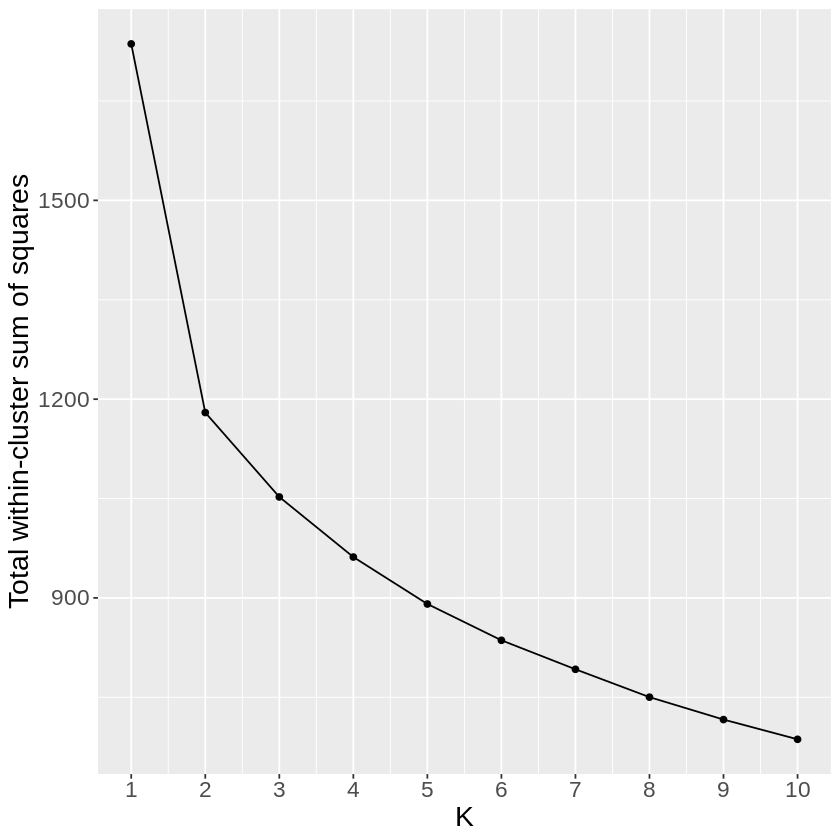

In [23]:
#DON'T CHANGE THIS SEED VALUE
set.seed(2019)

# your code here 2
# NO NEED FOR SCALING????
elbow_stats <- tibble(k = 1:10) %>%
        mutate(cat_clusts = map(k, ~kmeans(clean_reviews, .x ,nstart=100)), glanced = map(cat_clusts , glance)) %>% 
        select(-cat_clusts) %>% unnest(glanced)
elbow_stats

tourism_elbow_plot <- ggplot(elbow_stats, aes(x = k, y = tot.withinss)) +
  geom_point() +
  geom_line() +
  xlab("K") +
  ylab("Total within-cluster sum of squares") +
  scale_x_continuous(breaks = 1:10)+
  theme(text = element_text(size = 17))
tourism_elbow_plot

In [24]:
test_that('Did not create an object called elbow_stats', {
    expect_true(exists('elbow_stats'))
})
test_that('Did not create a plot called tourism_elbow_plot', {
    expect_true(exists('tourism_elbow_plot'))
})
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

**Question 2.2** 
<br> {points: 3}

From the elbow plot above, which $k$ should you choose? Explain why you chose that $k$.

By looking at the elbow plot here, we can see that there is a huge jump (or decrease) between K=1 and K=2, but that jump seems to get smaller between K=2 and K=3. We should choose K=2 for our algorithm because we can see that the rate of change of WSSD decreases for K>2 and we get very high WSSD values for K<2. That means for K>2 we are actually subgrouping the clusters, and therefore it is not the best K value, the elbow point for this plot seems to be at K=2 and the best options for this case seems to be K=2.   

**Question 2.3**
<br> {points: 3}

Run kmeans again, with the optimal $k$, and assign your answer to an object called `reviews_clusters`. Use `nstart = 100`. Then, use the `augment` function to get the cluster assignments for each point. Name the data frame `cluster_assignments`.

In [25]:
#DONT CHANGE THIS SEED VALUE
set.seed(2019)

# your code here
reviews_clusters <- kmeans(clean_reviews, centers = 2, nstart = 10)
#reviews_clusters

cluster_assignments <- augment(reviews_clusters, clean_reviews)
cluster_assignments

Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,.cluster
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,2
1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,2
1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,1
0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,1
0.93,0.56,1.13,0.51,1.34,2.36,3.18,2.87,1.34,2.40,2


For the following 2 questions use the following plot as reference. 

> The visualization below is a density plot, you can think of it as a smoothed version of a histogram. Density plots are more effective for comparing multiple distributions. What we are looking for with these visualizations, is to see which variables have difference distributions between the different clusters.

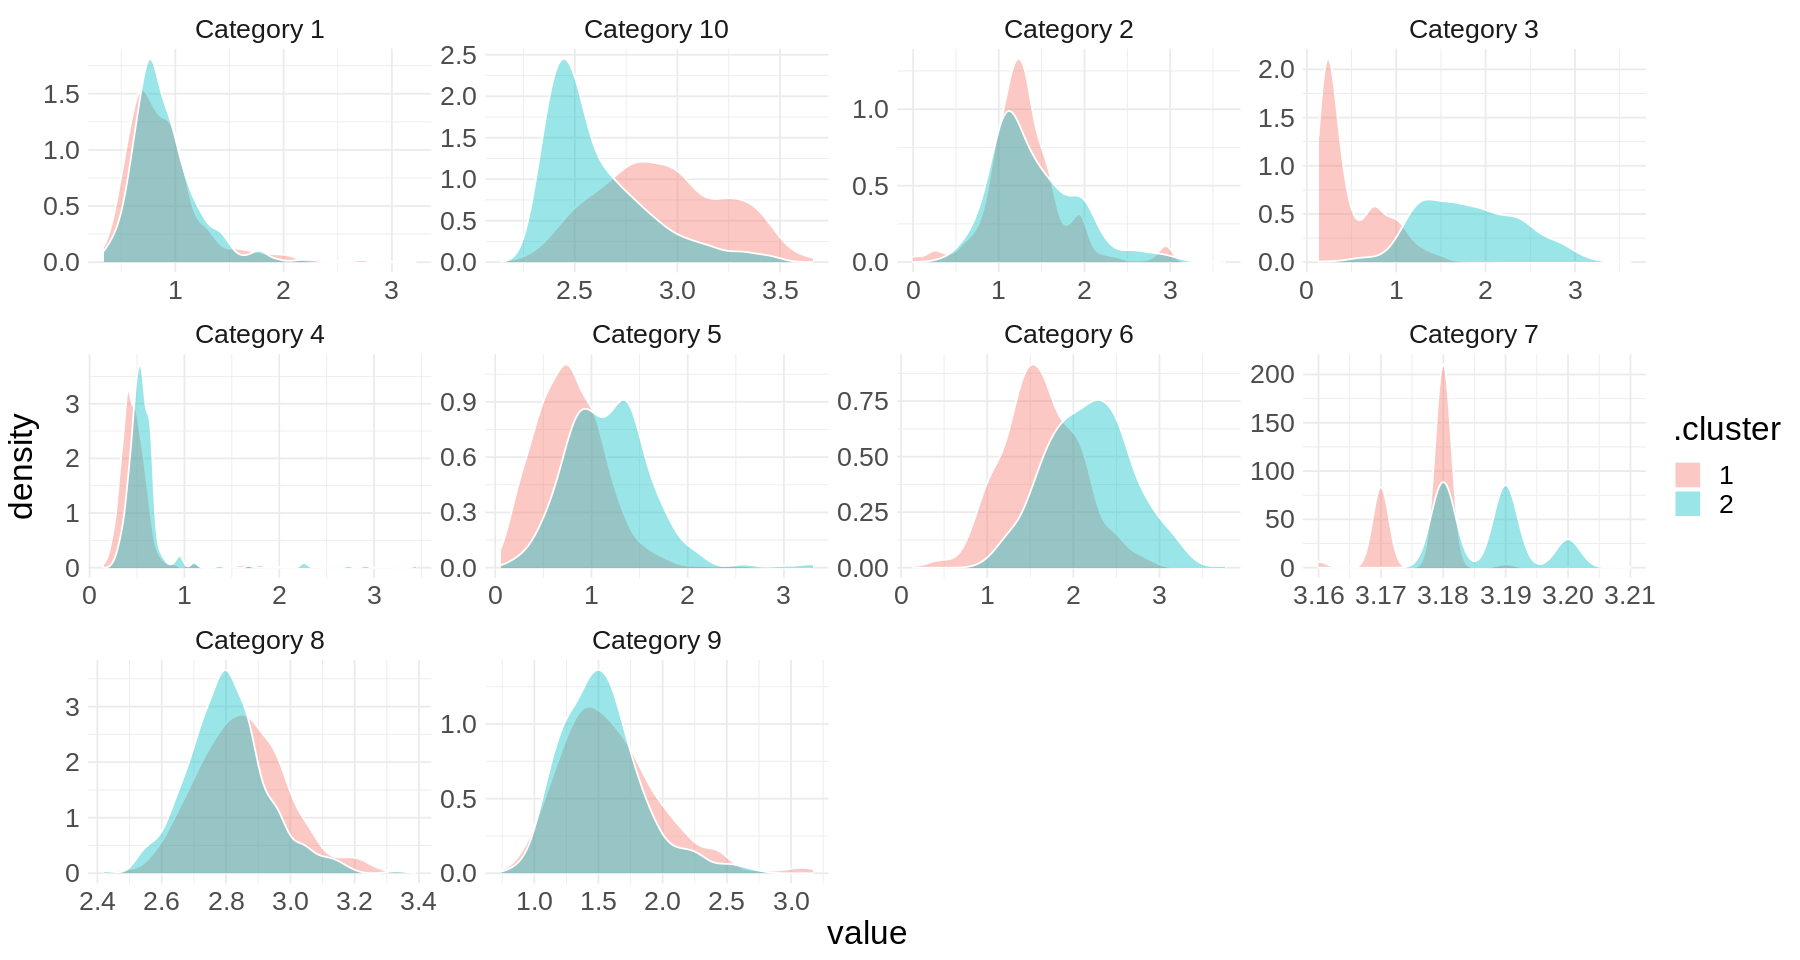

In [26]:
options(repr.plot.height = 8, repr.plot.width = 15)
cluster_assignments %>%
    pivot_longer(cols = -.cluster, names_to = 'category', values_to = 'value')  %>% 
    ggplot(aes(value, fill = .cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(~ category, scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

**Question 2.4** Multiple Choice:
<br> {points: 1}

From the plots above, point out the categories that we might hypothesize are driving the clustering? (i.e., are useful to distinguish between the type of tourists?) We list the table of the categories below. 

- Category 1 : Average user feedback on art galleries 
- Category 2 : Average user feedback on dance clubs 
- Category 3 : Average user feedback on juice bars 
- Category 4 : Average user feedback on restaurants 
- Category 5 : Average user feedback on museums 
- Category 6 : Average user feedback on resorts 
- Category 7 : Average user feedback on parks/picnic spots 
- Category 8 : Average user feedback on beaches 
- Category 9 : Average user feedback on theaters 
- Category 10 : Average user feedback on religious institutions

A. 10, 3, 5, 6, 7

B. 10, 3, 5, 6, 1

C. 10, 3, 4, 6, 7

D. 10, 2, 5, 6, 7

*Assign your answer to an object called `answer2.4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [27]:
# your code here
answer2.4 <- "A"
answer2.4

[1] "A"

In [28]:
test_that('Did not create an object called answer2.4', {
    expect_true(exists('answer2.4'))
    })
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.


**Question 2.5** 
<br> {points: 3}

Discuss one disadvantage of not being able to visualize the clusters when dealing with multidimensional data.

Some of the disadvantages of not being able to visualize the clusters when dealing with multidimensional data are issues with interpretation of clusters and how each of the variables we have play a part in clustering. Just like in regression and classification, visualizing multidimensional data (data with many variables) is hard, and it is hard to interpret the results.

I also believe this should be a lot harder for clustering because we are trying to make some clustering and groupings with different variables we have, whereas in regression we were trying to predict the value and in classification we were trying to predict the classification. We need to understand and interpret the clusters for our analysis better. Therefore, issues with visualization of clusters could impact our results, findings and explotary data analysis.  

In [29]:
source("cleanup_tutorial_10.R")